In [93]:
# reloads import files each time a cell is ran
%load_ext autoreload
%autoreload 2


import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve


import modeling as md
import wrangle as wr
import exploration as exp
import acquire
import prepare
import split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
zillow = acquire.get_zillow_data()
zillow.head()

Unnamed: 0  parcelid  typeconstructiontypeid  storytypeid  \
0           0  14297519                     NaN          NaN   
1           1  17052889                     NaN          NaN   
2           2  14186244                     NaN          NaN   
3           3  12177905                     NaN          NaN   
4           4  12095076                     NaN          NaN   

   heatingorsystemtypeid  buildingclasstypeid  architecturalstyletypeid  \
0                    NaN                  NaN                       NaN   
1                    NaN                  NaN                       NaN   
2                    NaN                  NaN                       NaN   
3                    2.0                  NaN                       NaN   
4                    2.0                  NaN                       NaN   

   airconditioningtypeid  propertylandusetypeid       id  ...  \
0                    NaN                  261.0  1727539  ...   
1                    NaN                  261.0  1387261  ...   
2                    NaN                  261.0    11677  ...   
3                    NaN                  261.0  2288172  ...   
4                    1.0                  261.0   781532  ...   

         propertylandusedesc  airconditioningdesc  architecturalstyledesc  \
0  Single Family Residential                  NaN                     NaN   
1  Single Family Residential                  NaN                     NaN   
2  Single Family Residential                  NaN                     NaN   
3  Single Family Residential                  NaN                     NaN   
4  Single Family Residential              Central                     NaN   

   buildingclassdesc  heatingorsystemdesc  storydesc  typeconstructiondesc  \
0                NaN                  NaN        NaN                   NaN   
1                NaN                  NaN        NaN                   NaN   
2                NaN                  NaN        NaN                   NaN   
3                NaN              Central        NaN                   NaN   
4                NaN              Central        NaN                   NaN   

   id.1  logerror  transactiondate  
0     0  0.025595       2017-01-01  
1     1  0.055619       2017-01-01  
2     2  0.005383       2017-01-01  
3     3 -0.103410       2017-01-01  
4     6 -0.001011       2017-01-01  

[5 rows x 70 columns]

In [95]:
zillow = wr.handle_missing_values(zillow)
zillow.columns

Index(['Unnamed: 0', 'parcelid', 'propertylandusetypeid', 'id', 'bathroomcnt',
       'bedroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'propertylandusedesc', 'id.1',
       'logerror', 'transactiondate'],
      dtype='object')

In [96]:
cols_to_drop = ['id', 'calculatedbathnbr', 'finishedsquarefeet12', 'propertycountylandusecode', 'propertylandusetypeid',
                'taxamount', 'landtaxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'id']
zillow.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52442 entries, 0 to 52441
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52442 non-null  int64  
 1   parcelid                      52442 non-null  int64  
 2   propertylandusetypeid         52442 non-null  float64
 3   id                            52442 non-null  int64  
 4   bathroomcnt                   52442 non-null  float64
 5   bedroomcnt                    52442 non-null  float64
 6   calculatedbathnbr             52305 non-null  float64
 7   calculatedfinishedsquarefeet  52360 non-null  float64
 8   finishedsquarefeet12          52195 non-null  float64
 9   fips                          52442 non-null  float64
 10  fullbathcnt                   52305 non-null  float64
 11  latitude                      52442 non-null  float64
 12  longitude                     52442 non-null  float64
 13  l

In [97]:
zillow = zillow.drop(columns=cols_to_drop)
zillow.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52442 entries, 0 to 52441
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52442 non-null  int64  
 1   parcelid                      52442 non-null  int64  
 2   bathroomcnt                   52442 non-null  float64
 3   bedroomcnt                    52442 non-null  float64
 4   calculatedfinishedsquarefeet  52360 non-null  float64
 5   fips                          52442 non-null  float64
 6   fullbathcnt                   52305 non-null  float64
 7   latitude                      52442 non-null  float64
 8   longitude                     52442 non-null  float64
 9   lotsizesquarefeet             52073 non-null  float64
 10  rawcensustractandblock        52442 non-null  float64
 11  regionidcity                  51405 non-null  float64
 12  regionidcounty                52442 non-null  float64
 13  r

In [98]:
zillow = zillow.dropna()
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50875 entries, 0 to 52441
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    50875 non-null  int64  
 1   parcelid                      50875 non-null  int64  
 2   bathroomcnt                   50875 non-null  float64
 3   bedroomcnt                    50875 non-null  float64
 4   calculatedfinishedsquarefeet  50875 non-null  float64
 5   fips                          50875 non-null  float64
 6   fullbathcnt                   50875 non-null  float64
 7   latitude                      50875 non-null  float64
 8   longitude                     50875 non-null  float64
 9   lotsizesquarefeet             50875 non-null  float64
 10  rawcensustractandblock        50875 non-null  float64
 11  regionidcity                  50875 non-null  float64
 12  regionidcounty                50875 non-null  float64
 13  r

In [153]:
df = acquire.get_zillow_data()
df.head()

Unnamed: 0  parcelid  typeconstructiontypeid  storytypeid  \
0           0  14297519                     NaN          NaN   
1           1  17052889                     NaN          NaN   
2           2  14186244                     NaN          NaN   
3           3  12177905                     NaN          NaN   
4           4  12095076                     NaN          NaN   

   heatingorsystemtypeid  buildingclasstypeid  architecturalstyletypeid  \
0                    NaN                  NaN                       NaN   
1                    NaN                  NaN                       NaN   
2                    NaN                  NaN                       NaN   
3                    2.0                  NaN                       NaN   
4                    2.0                  NaN                       NaN   

   airconditioningtypeid  propertylandusetypeid       id  ...  \
0                    NaN                  261.0  1727539  ...   
1                    NaN                  261.0  1387261  ...   
2                    NaN                  261.0    11677  ...   
3                    NaN                  261.0  2288172  ...   
4                    1.0                  261.0   781532  ...   

         propertylandusedesc  airconditioningdesc  architecturalstyledesc  \
0  Single Family Residential                  NaN                     NaN   
1  Single Family Residential                  NaN                     NaN   
2  Single Family Residential                  NaN                     NaN   
3  Single Family Residential                  NaN                     NaN   
4  Single Family Residential              Central                     NaN   

   buildingclassdesc  heatingorsystemdesc  storydesc  typeconstructiondesc  \
0                NaN                  NaN        NaN                   NaN   
1                NaN                  NaN        NaN                   NaN   
2                NaN                  NaN        NaN                   NaN   
3                NaN              Central        NaN                   NaN   
4                NaN              Central        NaN                   NaN   

   id.1  logerror  transactiondate  
0     0  0.025595       2017-01-01  
1     1  0.055619       2017-01-01  
2     2  0.005383       2017-01-01  
3     3 -0.103410       2017-01-01  
4     6 -0.001011       2017-01-01  

[5 rows x 70 columns]

In [154]:
df = wr.clean_zillow(df)
df

parcelid  bathroomcnt  bedroomcnt  sqr_ft         county  fullbathcnt  \
0      14297519          3.5         4.0  3100.0  orange_county          3.0   
1      17052889          1.0         2.0  1465.0        ventura          1.0   
2      14186244          2.0         3.0  1243.0  orange_county          2.0   
3      12177905          3.0         4.0  2376.0    los_angeles          3.0   
4      12095076          3.0         4.0  2962.0    los_angeles          3.0   
...         ...          ...         ...     ...            ...          ...   
52437  11000655          2.0         2.0  1286.0    los_angeles          2.0   
52438  17239384          2.0         4.0  1612.0        ventura          2.0   
52439  12773139          1.0         3.0  1032.0    los_angeles          1.0   
52440  12826780          2.0         3.0  1762.0    los_angeles          2.0   
52441  13083743          2.0         3.0  1050.0    los_angeles          2.0   

       latitude  longitude  lotsizesquarefeet  rawcensustractandblock  \
0      33634931 -117869207             4506.0                60590630   
1      34449266 -119281531            12647.0                61110010   
2      33886168 -117823170             8432.0                60590218   
3      34245180 -118240722            13038.0                60373001   
4      34145202 -118179824            63000.0                60374608   
...         ...        ...                ...                     ...   
52437  34245368 -118282383            47405.0                60371014   
52438  34300140 -118706327            12105.0                61110084   
52439  34040895 -118038169             5074.0                60374338   
52440  33937685 -117996709             6347.0                60375034   
52441  34010864 -117900894             5927.0                60374081   

       yearbuilt  taxvaluedollarcnt  censustractandblock  logerror  \
0         1998.0          1023282.0       60590630072012  0.025595   
1         1967.0           464000.0       61110010023006  0.055619   
2         1962.0           564778.0       60590218022012  0.005383   
3         1970.0           145143.0       60373001001006 -0.103410   
4         1950.0           773303.0       60374608001014 -0.001011   
...          ...                ...                  ...       ...   
52437     1940.0           354621.0       60371014003002  0.020615   
52438     1964.0            67205.0       61110084022016  0.013209   
52439     1954.0            49546.0       60374338022005  0.037129   
52440     1955.0           522000.0       60375034021020  0.007204   
52441     1960.0           259334.0       60374081401000 -0.197755   

      transactiondate  
0          2017-01-01  
1          2017-01-01  
2          2017-01-01  
3          2017-01-01  
4          2017-01-01  
...               ...  
52437      2017-09-20  
52438      2017-09-21  
52439      2017-09-21  
52440      2017-09-25  
52441      2018-05-25  

[49996 rows x 15 columns]

In [156]:
df, quants, cats = wr.wrangle_zillow()
df.head()

parcelid  bathroomcnt  bedroomcnt  sqr_ft         county  fullbathcnt  \
0  14297519          3.5         4.0  3100.0  orange_county          3.0   
1  17052889          1.0         2.0  1465.0        ventura          1.0   
2  14186244          2.0         3.0  1243.0  orange_county          2.0   
3  12177905          3.0         4.0  2376.0    los_angeles          3.0   
4  12095076          3.0         4.0  2962.0    los_angeles          3.0   

   latitude  longitude  lotsizesquarefeet  rawcensustractandblock  yearbuilt  \
0  33634931 -117869207             4506.0                60590630     1998.0   
1  34449266 -119281531            12647.0                61110010     1967.0   
2  33886168 -117823170             8432.0                60590218     1962.0   
3  34245180 -118240722            13038.0                60373001     1970.0   
4  34145202 -118179824            63000.0                60374608     1950.0   

   taxvaluedollarcnt  censustractandblock  logerror transactiondate  
0          1023282.0       60590630072012  0.025595      2017-01-01  
1           464000.0       61110010023006  0.055619      2017-01-01  
2           564778.0       60590218022012  0.005383      2017-01-01  
3           145143.0       60373001001006 -0.103410      2017-01-01  
4           773303.0       60374608001014 -0.001011      2017-01-01

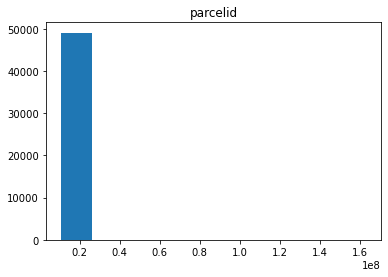

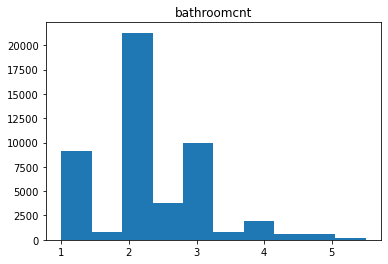

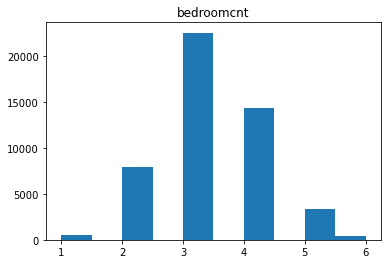

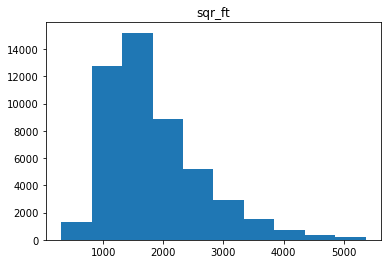

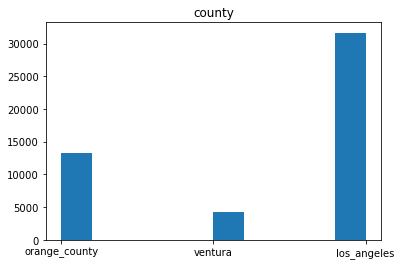

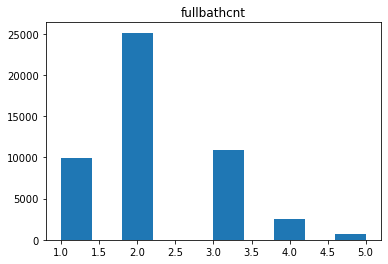

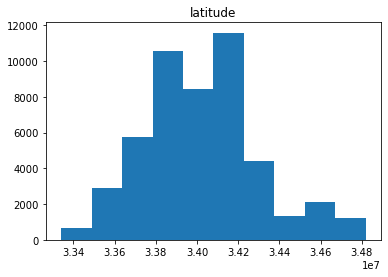

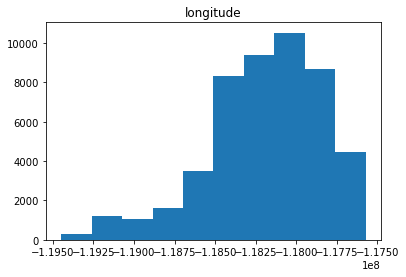

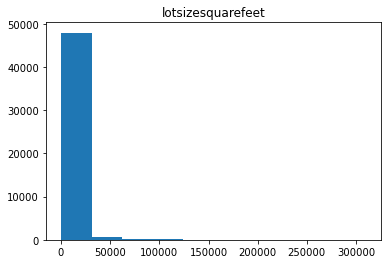

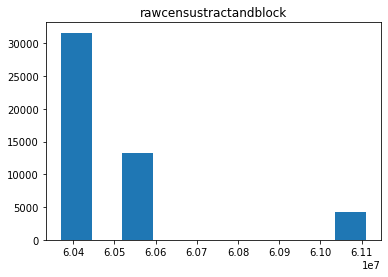

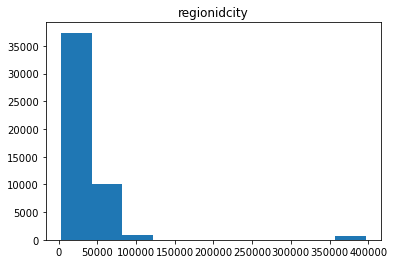

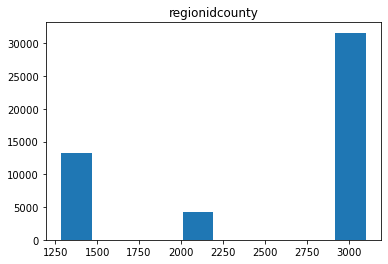

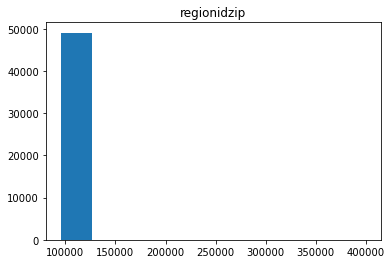

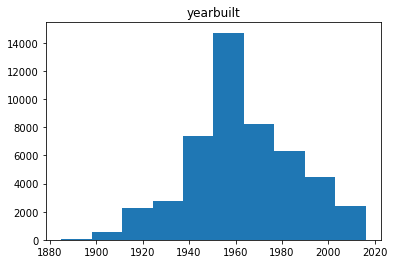

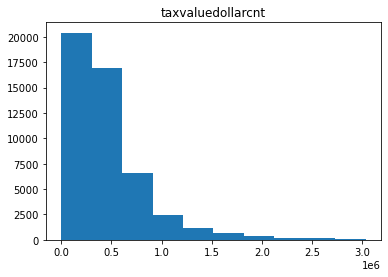

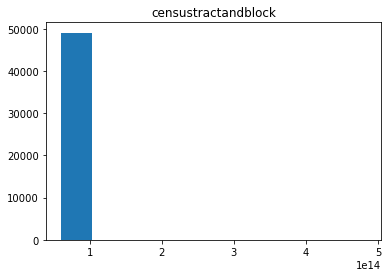

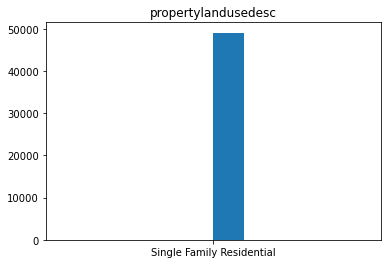

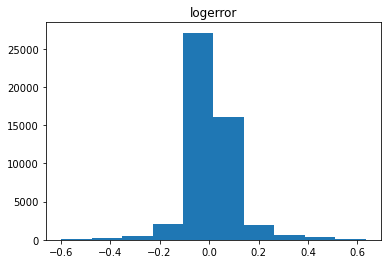

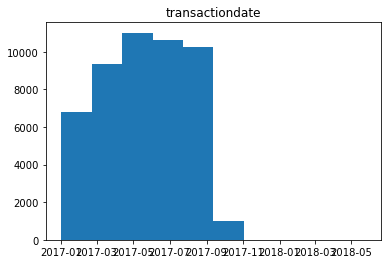

In [138]:

for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [209]:
target_var = 'logerror'
train, validate, test = split.train_validate_test_split(df, target_var)
train.head()

parcelid  bathroomcnt  bedroomcnt  sqr_ft       county  fullbathcnt  \
32588  11120842          3.0         3.0  3056.0  los_angeles          3.0   
20585  12717260          1.0         2.0   795.0  los_angeles          1.0   
8273   11083428          2.0         4.0  1600.0  los_angeles          2.0   
20786  11541895          2.0         3.0  1142.0  los_angeles          2.0   
27796  11040421          1.0         3.0  1066.0  los_angeles          1.0   

       latitude  longitude  lotsizesquarefeet  rawcensustractandblock  \
32588  34428276 -118555953             6591.0                60379201   
20585  33949006 -118087594             4977.0                60375027   
8273   34259656 -118513460             7624.0                60371113   
20786  34003716 -118416832             5534.0                60377028   
27796  34262396 -118463260             8988.0                60371096   

       yearbuilt  taxvaluedollarcnt  censustractandblock  logerror  \
32588     2003.0           686362.0       60379201152021  0.056105   
20585     1950.0            44688.0       60375027003011 -0.008162   
8273      1963.0            98743.0       60371113013013 -0.017612   
20786     1947.0            84247.0       60377028022013 -0.156109   
27796     1952.0           340108.0       60371096043007  0.034442   

      transactiondate  
32588      2017-06-20  
20585      2017-04-28  
8273       2017-02-24  
20786      2017-04-28  
27796      2017-05-31

In [211]:
df, quants, cats = wr.wrangle_zillow()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49772 entries, 0 to 52441
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   parcelid                    49772 non-null  int64         
 1   bathroomcnt                 49772 non-null  float64       
 2   bedroomcnt                  49772 non-null  float64       
 3   sqr_ft                      49772 non-null  float64       
 4   county                      49772 non-null  object        
 5   fullbathcnt                 49772 non-null  float64       
 6   latitude                    49772 non-null  int64         
 7   longitude                   49772 non-null  int64         
 8   lotsizesquarefeet           49772 non-null  float64       
 9   rawcensustractandblock      49772 non-null  int64         
 10  yearbuilt                   49772 non-null  float64       
 11  structuretaxvaluedollarcnt  49772 non-null  float64   

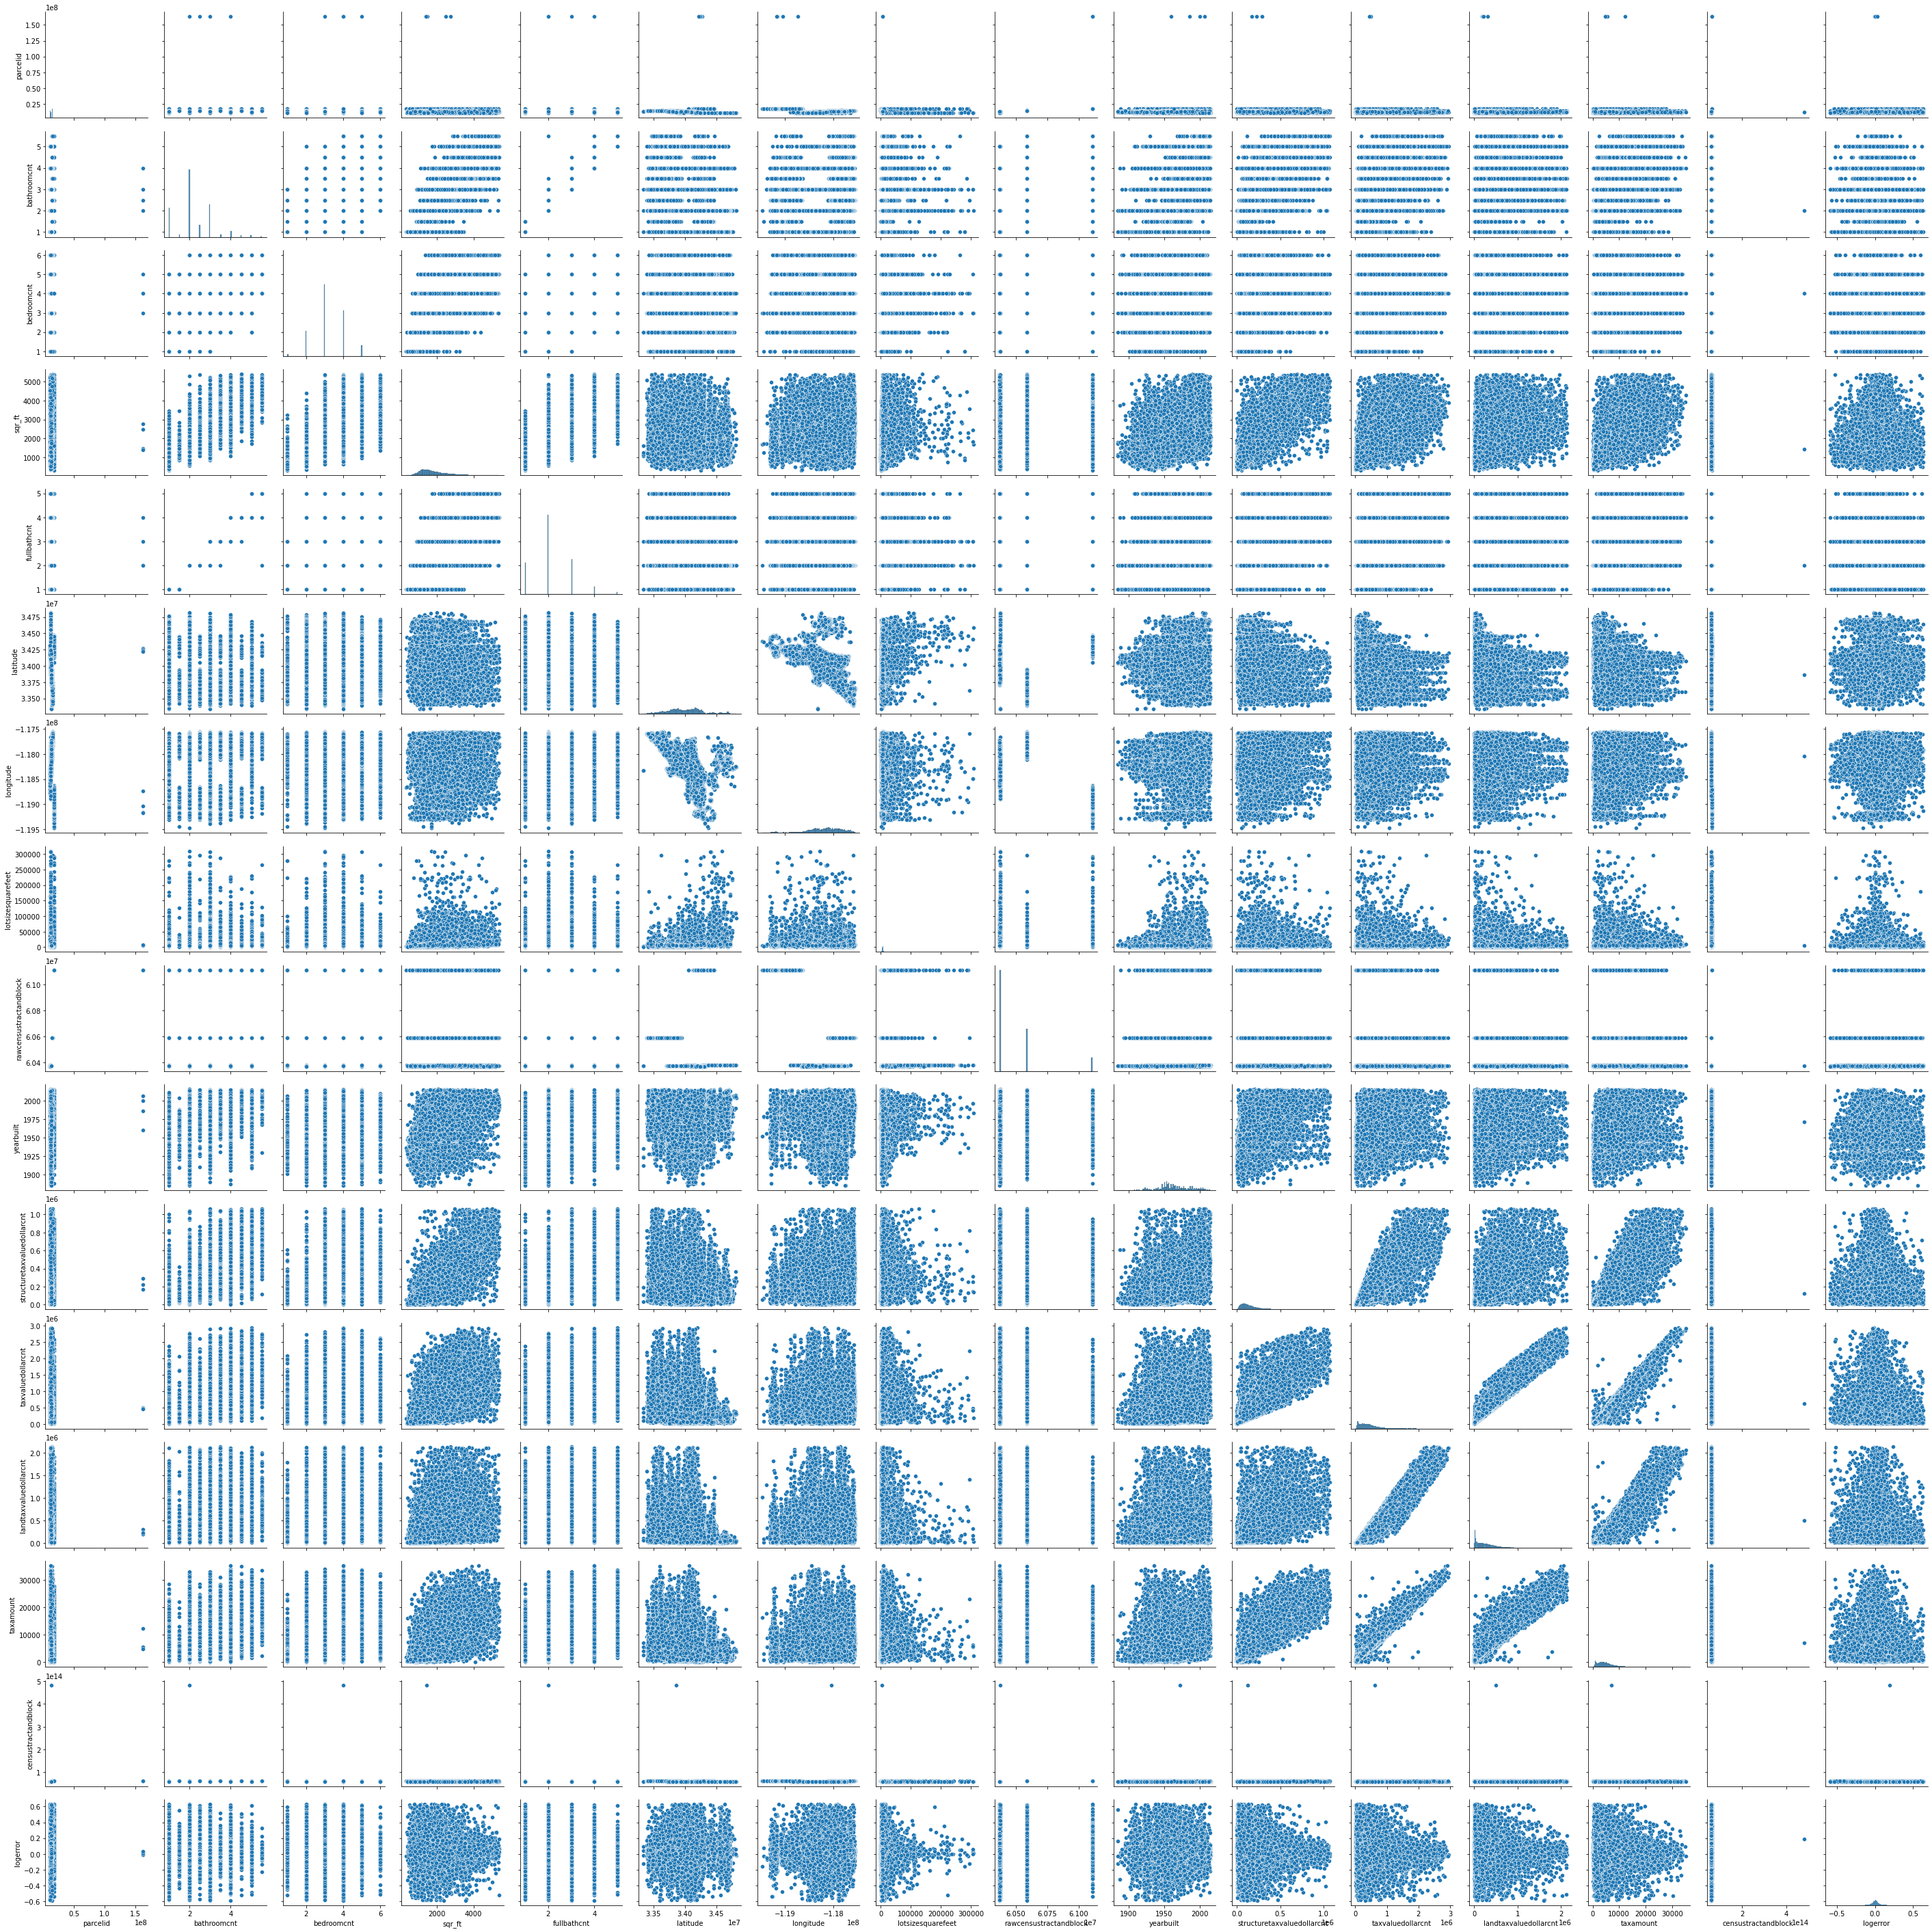

In [212]:
sns.pairplot(df)